In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Importing the Cleveland data
df_cleveland = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/cleveland_data.csv", index_col=0)

In [22]:
df_cleveland.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [27]:
# Creating a benchmark model

# Importing the logistic regression model
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model
lr_classifier = LogisticRegression(tol=1e-6, solver='liblinear', max_iter=200,)

In [24]:
# Separting the data into features and labels
X = df_cleveland.loc[:, df_cleveland.columns != "num"]
y = df_cleveland["num"]

In [40]:
# Importing the cross validation function
from sklearn.model_selection import cross_validate

# Training the model using cross validation
cv_results = cross_validate(lr_classifier, X, y, cv=8,
                            scoring=["recall", "precision", "accuracy"],
                            return_train_score=True)

In [46]:
# Displaying the training accuracy metrics
print("The mean training accuracy is", cv_results["train_accuracy"].mean())
print("The mean training recall is", cv_results["train_recall"].mean())
print("The mean training precision is", cv_results["train_precision"].mean())

print('\n')

# Displaying the test accuracy metrics
print("The mean test accuracy is", cv_results["test_accuracy"].mean())
print("The mean test recall is", cv_results["test_recall"].mean())
print("The mean test precision is", cv_results["test_precision"].mean())

The mean training accuracy is 0.8552123552123552
The mean training recall is 0.8175245098039216
The mean training precision is 0.862710321716577


The mean test accuracy is 0.8412162162162162
The mean test recall is 0.7965686274509804
The mean test precision is 0.8657186950046858


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/yellowbrick/model_selection/importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


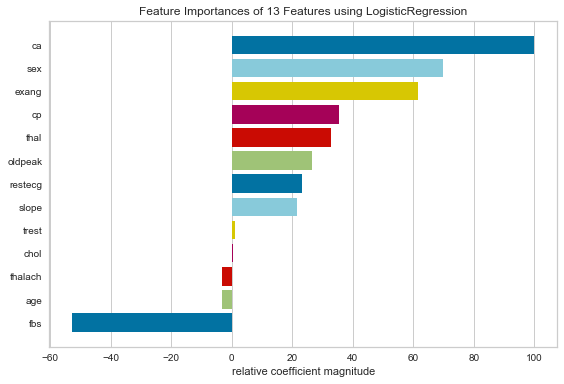

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12ed45c88>,
                   model=None)

In [47]:
# Visualzing the feature importance from the logistic regression model

# Importing the function
from yellowbrick.model_selection.importances import feature_importances

# Creating the graph
feature_importances(lr_classifier, X, y)